In [31]:
## not needed but allows to reload new version of Profile_likelihood_ratio.py at import
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize as sp_minimize
%matplotlib inline

In [33]:
from Profile_likelihood_ratio import Profile_likelihood_ratio, Profile_likelihood_ratio_Factory
from Profile_likelihood_ratio import Profile_likelihood_ratio_result

In [34]:
plr_fatory = Profile_likelihood_ratio_Factory(  n_exp=1000, 
                                                n_data=1000, 
                                                true_mu=0., true_sigma=1., 
                                                data_generator_name='gaus',
                                                model='m2_log_likelihood_gaus',
                                                parameter_of_interest='mu',
                                                debug_level=0, 
                                                output_tag='bar', 
                                                confidence_level=[0.954499736104, 0.682689492137],
                                             )


df = plr_fatory.run()

::: output_file         : mod_fact_out_ndata_1000_nexp_1000
::: output_tag          : bar
::: true_mu             : 0.0
::: n_data              : 1000
::: data_generator_name : gaus
::: debug_level         : 0
::: true_sigma          : 1.0
::: n_exp               : 1000
::: model               : m2_log_likelihood_gaus
::: confidence_level    : [0.954499736104, 0.682689492137]
::: poi_name            : mu
::: Iteration 0 (1000 to go)
::: Iteration 100 (900 to go)
::: Iteration 200 (800 to go)
::: Iteration 300 (700 to go)
::: Iteration 400 (600 to go)
::: Iteration 500 (500 to go)
::: Iteration 600 (400 to go)
::: Iteration 700 (300 to go)
::: Iteration 800 (200 to go)
::: Iteration 900 (100 to go)
::: Time to run 1000 iterations: 33.108864069
::: Time to create result dict: 0.00462603569031
::: Time to create result data frame: 0.00292015075684


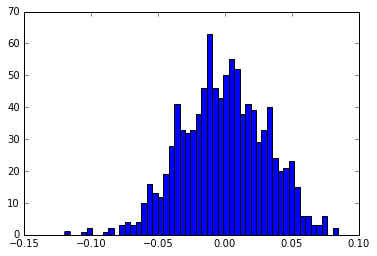

In [35]:
_ = plt.hist(plr_fatory.data_frame_result['poi_mle'], 50)

In [36]:
df['true_mu_in_c_0'] = df.apply(lambda x : 1 if x['true_mu']<x['ci_poi_max'][0] and x['true_mu']>x['ci_poi_min'][0] else 0, axis=1)
df['true_mu_in_c_1'] = df.apply(lambda x : 1 if x['true_mu']<x['ci_poi_max'][1] and x['true_mu']>x['ci_poi_min'][1] else 0, axis=1)

In [37]:
print float(df.true_mu_in_c_1.sum())/len(df)
print float(df.true_mu_in_c_0.sum())/len(df)

0.657
0.967
